In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import create_dataset
from create_dataset import * 
import load_data
from load_data import *
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [3]:
ml_folder = Path('/content/drive/MyDrive/ML projet')
ml_folder.exists()
data_path = ml_folder/'DataLFP.mat'

In [4]:
np.random.seed(42)

In [24]:
def compare_hit_miss(hits, misses, plot_fun):
  N = len(misses)
  fig, axs = plt.subplots(ncols=2, nrows=N, figsize=(8,N*5), sharey=True)

  for i in range(N):
    axs[i,0].set_title(f'hit {i}')
    axs[i,1].set_title(f'miss {i}')

    plot_fun(axs[i,0], hits[i])
    plot_fun(axs[i,1], misses[i])


def plot_in_time(ax, X):
  ax.plot(X)
  ax.set_ylabel('amplitude')
  ax.set_xlabel('time (in samples)')

def plot_in_frequency(ax, X):
  D = librosa.stft(X, n_fft=128, hop_length=16)  
  S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
  librosa.display.specshow(S_db, ax=ax, x_axis='time',  hop_length=16,
                         y_axis='log', sr=2000)

In [7]:
X_wS1, y_wS1 = X, y = create_dataset(data_path, 'wS1', select_amplitude=[2,3])
X_wS1.shape, y_wS1.shape

((2556, 5000), (2556,))

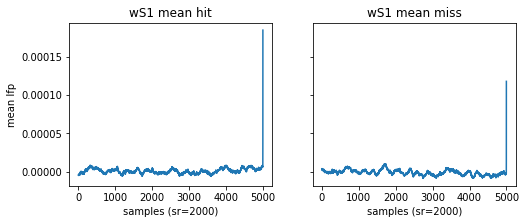

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(8,3), sharey=True, sharex=True)
axs[0].plot(X_wS1[y_wS1==1].mean(axis=0))
axs[0].set_xlabel('samples (sr=2000)')
axs[0].set_title('wS1 mean hit')
axs[0].set_ylabel('mean lfp')
axs[1].plot(X_wS1[y_wS1==0].mean(axis=0))
axs[1].set_title('wS1 mean miss')
axs[1].set_xlabel('samples (sr=2000)')
fig.savefig('./cut_last')

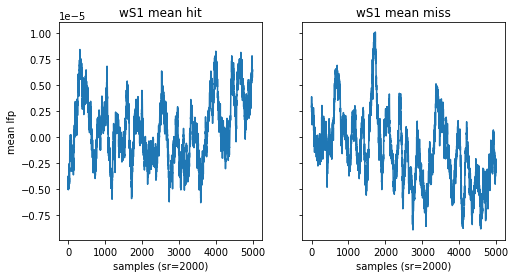

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(8,4), sharey=True, sharex=True)
axs[0].plot(X_wS1[y_wS1==1][:,:-4].mean(axis=0))
axs[0].set_xlabel('samples (sr=2000)')
axs[0].set_title('wS1 mean hit')
axs[0].set_ylabel('mean lfp')
axs[1].plot(X_wS1[y_wS1==0][:,:-4].mean(axis=0))
axs[1].set_title('wS1 mean miss')
axs[1].set_xlabel('samples (sr=2000)')
fig.savefig('./compare_mean_wS1')

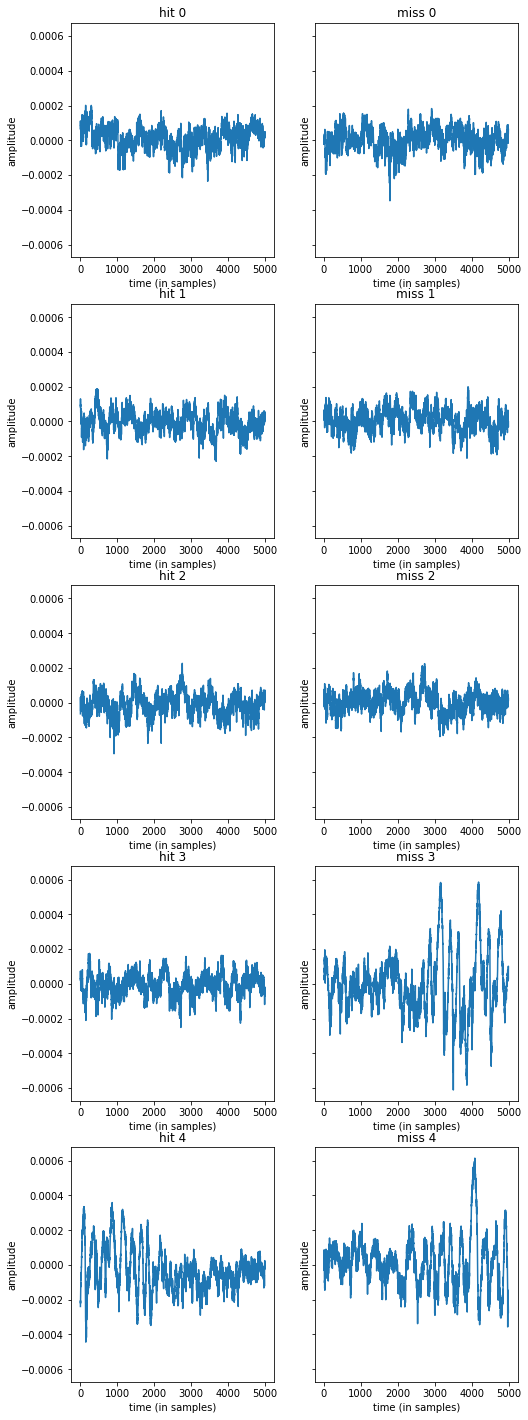

In [25]:
hits = X_wS1[y_wS1==1][:5,:-4]
misses = X_wS1[y_wS1==0][:5,:-4]

compare_hit_miss(hits, misses, plot_in_time)

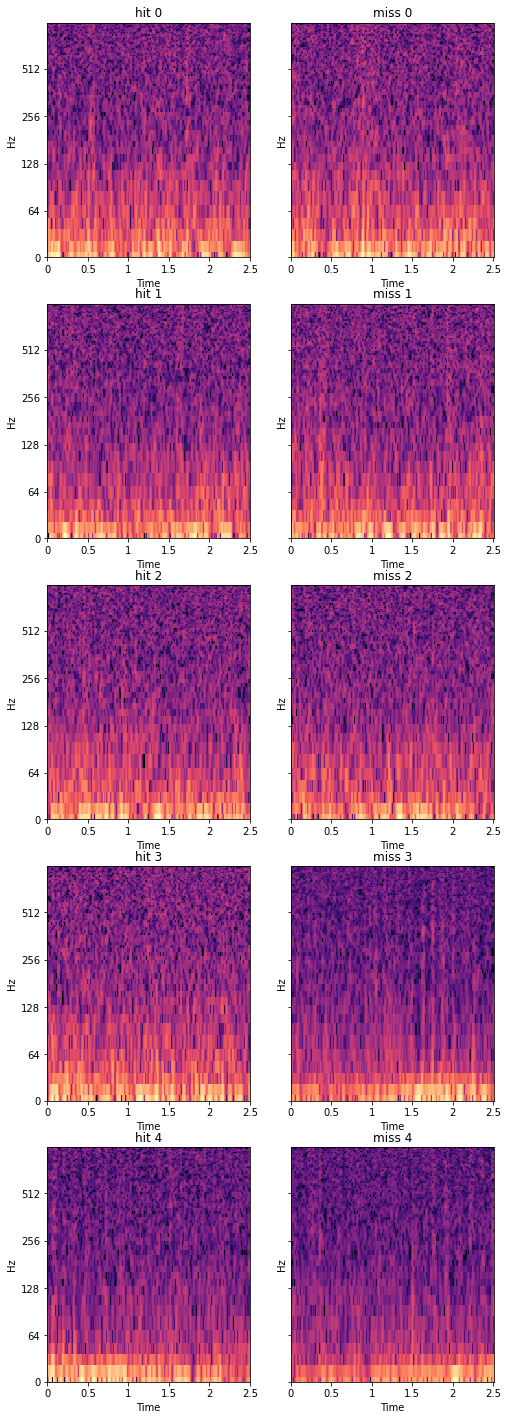

In [26]:
compare_hit_miss(hits, misses, plot_in_frequency)

In [27]:
X_mPFC, y_mPFC = X, y = create_dataset(data_path, 'mPFC', select_amplitude=[2,3])
X_mPFC.shape, y_mPFC.shape

((1666, 5000), (1666,))

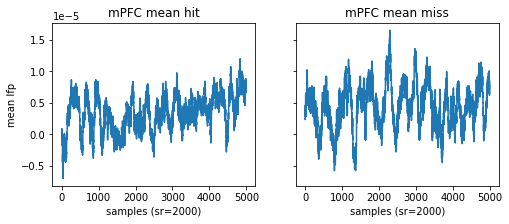

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8,3), sharey=True, sharex=True)
axs[0].plot(X_mPFC[y_mPFC==1][:,:-4].mean(axis=0))
axs[0].set_xlabel('samples (sr=2000)')
axs[0].set_title('mPFC mean hit')
axs[0].set_ylabel('mean lfp')
axs[1].plot(X_mPFC[y_mPFC==0][:,:-4].mean(axis=0))
axs[1].set_title('mPFC mean miss')
axs[1].set_xlabel('samples (sr=2000)')
fig.savefig('./compare_mean_mPFC')

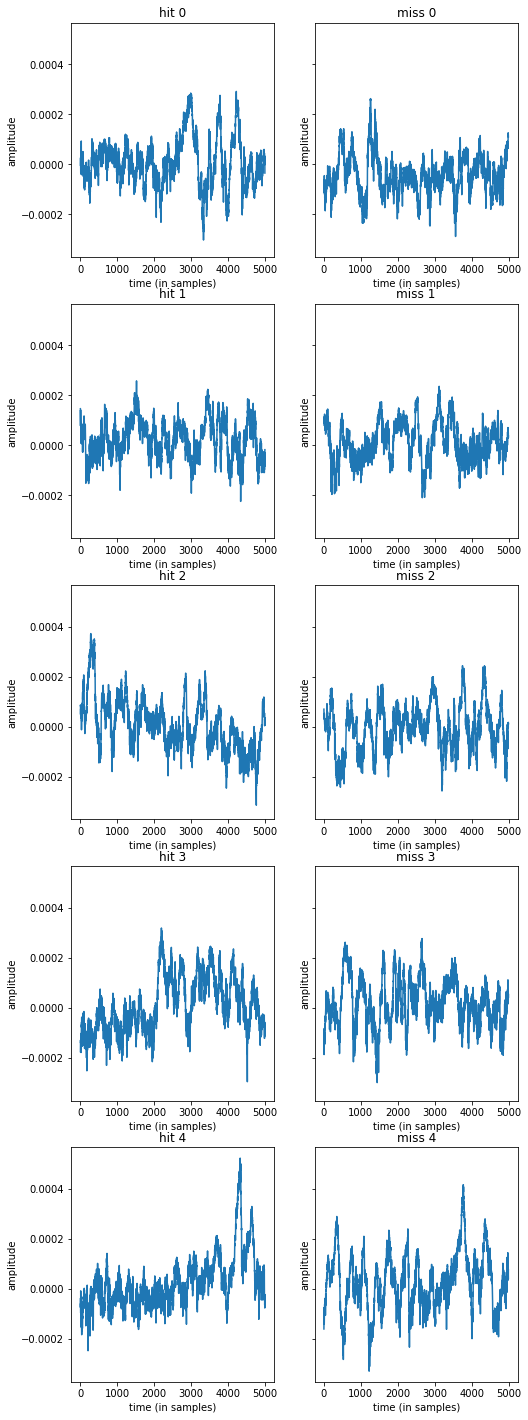

In [28]:
hits = X_mPFC[y_mPFC==1][:5,:-4]
misses = X_mPFC[y_mPFC==0][:5,:-4]

compare_hit_miss(hits, misses, plot_in_time)

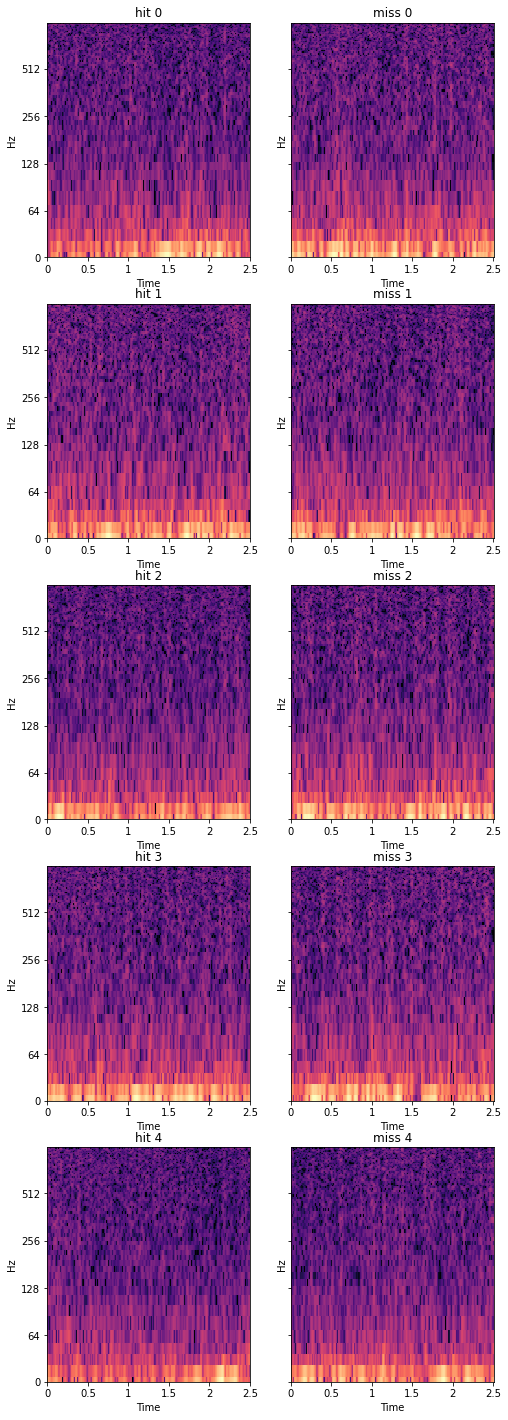

In [30]:
compare_hit_miss(hits, misses, plot_in_frequency)

In [31]:
X_tjM1, y_tjM1 = X, y = create_dataset(data_path, 'tjM1', select_amplitude=[2,3])
X_tjM1.shape, y_tjM1.shape

((749, 5000), (749,))

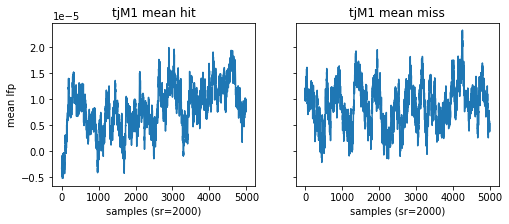

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8,3), sharey=True, sharex=True)
axs[0].plot(X_tjM1[y_tjM1==1][:,:-4].mean(axis=0))
axs[0].set_xlabel('samples (sr=2000)')
axs[0].set_title('tjM1 mean hit')
axs[0].set_ylabel('mean lfp')
axs[1].plot(X_tjM1[y_tjM1==0][:,:-4].mean(axis=0))
axs[1].set_title('tjM1 mean miss')
axs[1].set_xlabel('samples (sr=2000)')
fig.savefig('./compare_mean_tjM1')

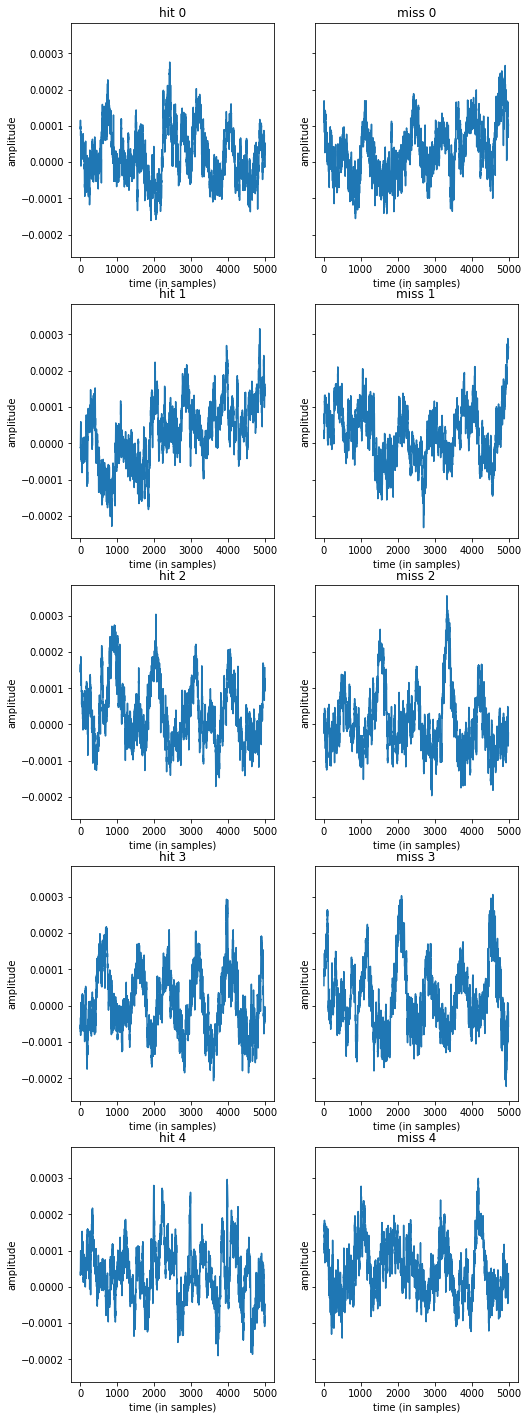

In [32]:
hits = X_tjM1[y_tjM1==1][:5,:-4]
misses = X_tjM1[y_tjM1==0][:5,:-4]

compare_hit_miss(hits, misses, plot_in_time)

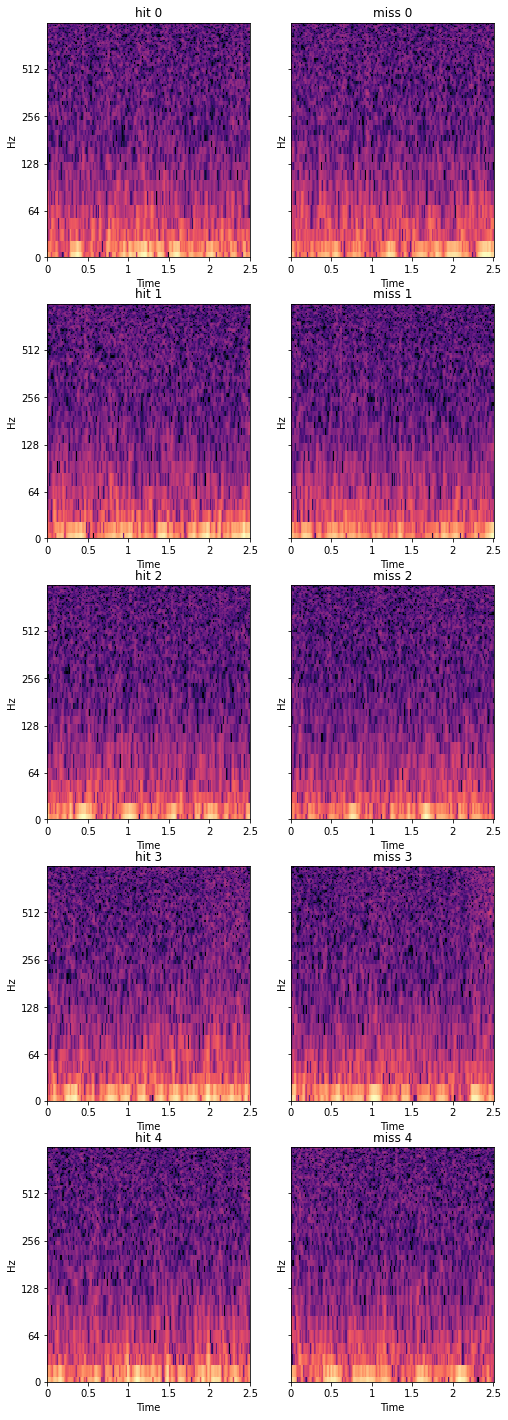

In [33]:
compare_hit_miss(hits, misses, plot_in_frequency)